# Wstęp do programowania zorientowanego obiektowo

Zamodelujemy dynamikę rozwoju populacji. 

Parametry
1. Prawdobieństwo zgonu
2. Prawdopodobieństwo rozmnożenia

In [76]:
import random
import matplotlib.pyplot as plt

In [137]:
class Creature:
    alive = True

    def __init__(self, p_death=0.1, p_reproduce=0.1):
        self.p_death = p_death
        self.p_reproduce = p_reproduce 
    
    def natural_selection(self):
        if random.random() < self.p_death: 
            self.alive = False
            
    def reproduce(self):
        if (random.random() < self.p_reproduce) and self.alive:
            return Creature()  # POTOMKOWIE POWINNI DZIEDZICZYĆ CECHY!

In [142]:
def count_alive(population):
    """Counts number of creatures in the population that are alive"""
    return len({creature for creature in population if creature.alive})

def make_population(n, p_death=0.1, p_reproduce=0.1):
    """Creates population"""
    return {Creature(p_death, p_reproduce) for _ in range(n)}

def natural_selection(population):
    """Applies natural selection process to the population"""
    {creature.natural_selection() for creature in population}

def reproduce(population):
    """Returns set of reproduced creatures for our population"""
    return {creature.reproduce() for creature in population} - {None}

In [169]:
p_death = 0.1
p_reproduce = 0.7

population = make_population(100, p_death, p_reproduce)

In [161]:
alive = [count_alive(population)]
for _ in range(200):
    new_creatures = reproduce(population)
    natural_selection(population)

    population = population | new_creatures

    
    alive.append(count_alive(population))

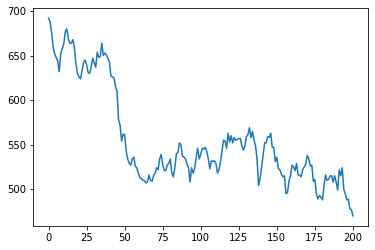

In [162]:
plt.plot(alive)

0.1